In [1]:
from matplotlib import pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
from collections import OrderedDict

In [2]:
df = pd.read_excel("effects_results_paper.ods", engine="odf")

In [3]:
df.head()

,graph_type,model_type,class_name,Top 5 concepts,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,bk_part_obj_color,inception_imageneta_bias,ants,"middle_of_notebook(0.7085870696458941),plastic...",NaN,NaN,graph_type,primary concepts,secondary concepts,causal discovery method
1,bk_part_obj_color,inception_imageneta_bias,mantis,"legs_of_dog(1.3519263609831882),top-left_of_tr...",NaN,NaN,bk_part_obj_color,obj+part,color,fixed template
2,bk_part_obj_color,inception_imageneta_bias,bees,"color_beige(0.7499348982100286),camera(0.69871...",NaN,NaN,bk_obj_color,obj,color,fixed template
3,bk_part_obj_color,squeezenet_imageneta_bias,ants,"copyright_of_petri_dish(0.8878565195759105),si...",NaN,NaN,cds_part_obj_color,obj+part,color,cds
4,bk_part_obj_color,squeezenet_imageneta_bias,mantis,"inside_of_basket(1.0401719964340876),string_of...",NaN,NaN,cds_obj_color,obj,color,cds


In [4]:
df.drop(["Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"], axis=1, inplace=True)

In [5]:
df_imagenet = df[df['model_type'].str.contains('imageneta')]
print(len(df_imagenet))
df_imagenet.head()

24


,graph_type,model_type,class_name,Top 5 concepts
0,bk_part_obj_color,inception_imageneta_bias,ants,"middle_of_notebook(0.7085870696458941),plastic..."
1,bk_part_obj_color,inception_imageneta_bias,mantis,"legs_of_dog(1.3519263609831882),top-left_of_tr..."
2,bk_part_obj_color,inception_imageneta_bias,bees,"color_beige(0.7499348982100286),camera(0.69871..."
3,bk_part_obj_color,squeezenet_imageneta_bias,ants,"copyright_of_petri_dish(0.8878565195759105),si..."
4,bk_part_obj_color,squeezenet_imageneta_bias,mantis,"inside_of_basket(1.0401719964340876),string_of..."


In [6]:
def get_concept_list(s):
    concepts = s.split(",")
    clean = [c[0:c.find("(")] for c in concepts]
    return clean

df_imagenet["concepts"] = df_imagenet["Top 5 concepts"].apply(lambda s: get_concept_list(s))
df_imagenet.head()

/var/folders/7d/nc4thym14h33bjbwklwp_9zw0000gn/T/ipykernel_16734/1765396847.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imagenet["concepts"] = df_imagenet["Top 5 concepts"].apply(lambda s: get_concept_list(s))


,graph_type,model_type,class_name,Top 5 concepts,concepts
0,bk_part_obj_color,inception_imageneta_bias,ants,"middle_of_notebook(0.7085870696458941),plastic...","[middle_of_notebook, plastic_box, bottom_of_le..."
1,bk_part_obj_color,inception_imageneta_bias,mantis,"legs_of_dog(1.3519263609831882),top-left_of_tr...","[legs_of_dog, top-left_of_tree, head_of_grassh..."
2,bk_part_obj_color,inception_imageneta_bias,bees,"color_beige(0.7499348982100286),camera(0.69871...","[color_beige, camera, middle_of_bicycle, bee, ..."
3,bk_part_obj_color,squeezenet_imageneta_bias,ants,"copyright_of_petri_dish(0.8878565195759105),si...","[copyright_of_petri_dish, side_of_leaf, bottom..."
4,bk_part_obj_color,squeezenet_imageneta_bias,mantis,"inside_of_basket(1.0401719964340876),string_of...","[inside_of_basket, string_of_tree, color_skin,..."


In [7]:
df_imagenet = df_imagenet.drop(["Top 5 concepts"], axis = 1)
df_imagenet.head()

,graph_type,model_type,class_name,concepts
0,bk_part_obj_color,inception_imageneta_bias,ants,"[middle_of_notebook, plastic_box, bottom_of_le..."
1,bk_part_obj_color,inception_imageneta_bias,mantis,"[legs_of_dog, top-left_of_tree, head_of_grassh..."
2,bk_part_obj_color,inception_imageneta_bias,bees,"[color_beige, camera, middle_of_bicycle, bee, ..."
3,bk_part_obj_color,squeezenet_imageneta_bias,ants,"[copyright_of_petri_dish, side_of_leaf, bottom..."
4,bk_part_obj_color,squeezenet_imageneta_bias,mantis,"[inside_of_basket, string_of_tree, color_skin,..."


In [8]:
df_imagenet_sq = df_imagenet[df_imagenet['model_type'].str.contains('squeezenet')]
df_imagenet_inc = df_imagenet[df_imagenet['model_type'].str.contains('inception')]

print(len(df_imagenet_sq))
print(len(df_imagenet_inc))

12
12


# Imagenet - SqueezeNet

In [29]:
df_imagenet_sq_part = df_imagenet_sq[df_imagenet_sq["graph_type"].str.contains("part_obj")]
print(len(df_imagenet_sq_part))
df_imagenet_sq_part.head()

6


,graph_type,model_type,class_name,concepts
3,bk_part_obj_color,squeezenet_imageneta_bias,ants,"[copyright_of_petri_dish, side_of_leaf, bottom..."
4,bk_part_obj_color,squeezenet_imageneta_bias,mantis,"[inside_of_basket, string_of_tree, color_skin,..."
5,bk_part_obj_color,squeezenet_imageneta_bias,bees,"[bottom_of_glass_jar, water_bottle, backpack, ..."
39,cds_part_obj_color,squeezenet_imageneta_bias,ants,"[bottom_of_petri_dish, copyright_of_petri_dish..."
40,cds_part_obj_color,squeezenet_imageneta_bias,mantis,"[color_skin, basket, color_plum, ant_statue, c..."


In [30]:
# Fixing names

def fix_names(row, part=False):
    new_str = ""
    if row == "ants":
        new_str = "Ant"
    elif row == "mantis":
        new_str = "Mantis"
    elif row == "bees":
        new_str = "Bee"
    elif row == "TEA_SPOON":
        new_str = "TS"
    elif row == "DINNER_CUTLERY":
        new_str = "DC"
    elif row == "FISH_SLICE":
        new_str = "FS"

    if part:
        new_str += "*"
    
    return new_str

df_imagenet_sq_part["class_name"] = df_imagenet_sq_part["class_name"].apply(lambda r : fix_names(r, part=True))
df_imagenet_sq_part

/var/folders/7d/nc4thym14h33bjbwklwp_9zw0000gn/T/ipykernel_16734/960145712.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imagenet_sq_part["class_name"] = df_imagenet_sq_part["class_name"].apply(lambda r : fix_names(r, part=True))


,graph_type,model_type,class_name,concepts
3,bk_part_obj_color,squeezenet_imageneta_bias,Ant*,"[copyright_of_petri_dish, side_of_leaf, bottom..."
4,bk_part_obj_color,squeezenet_imageneta_bias,Mantis*,"[inside_of_basket, string_of_tree, color_skin,..."
5,bk_part_obj_color,squeezenet_imageneta_bias,Bee*,"[bottom_of_glass_jar, water_bottle, backpack, ..."
39,cds_part_obj_color,squeezenet_imageneta_bias,Ant*,"[bottom_of_petri_dish, copyright_of_petri_dish..."
40,cds_part_obj_color,squeezenet_imageneta_bias,Mantis*,"[color_skin, basket, color_plum, ant_statue, c..."
41,cds_part_obj_color,squeezenet_imageneta_bias,Bee*,"[color_transplant, color_red, color_orange, co..."


In [31]:
df_imagenet_sq_obj = df_imagenet_sq[~df_imagenet_sq["graph_type"].str.contains("part_obj")]
print(len(df_imagenet_sq_obj))

df_imagenet_sq_obj["class_name"] = df_imagenet_sq_obj["class_name"].apply(lambda r : fix_names(r, part=False))

df_imagenet_sq_obj.head(6)

6


/var/folders/7d/nc4thym14h33bjbwklwp_9zw0000gn/T/ipykernel_16734/1107315325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imagenet_sq_obj["class_name"] = df_imagenet_sq_obj["class_name"].apply(lambda r : fix_names(r, part=False))


,graph_type,model_type,class_name,concepts
21,bk_obj_color,squeezenet_imageneta_bias,Ant,"[keyboard, grass, petri_dish, infested_trash_c..."
22,bk_obj_color,squeezenet_imageneta_bias,Mantis,"[basket, photo, color_skin, house_windows, loc..."
23,bk_obj_color,squeezenet_imageneta_bias,Bee,"[drinking_fountain, water_bottle, backpack, gl..."
57,cds_obj_color,squeezenet_imageneta_bias,Ant,"[ant, color_gray, color_maroon, color_plum, co..."
58,cds_obj_color,squeezenet_imageneta_bias,Mantis,"[basket, color_skin, color_yellow, ant_statue,..."
59,cds_obj_color,squeezenet_imageneta_bias,Bee,"[color_transplant, fingers, can, bee, bicycle_..."


In [12]:
algs = ["bk", "cds"]
class_obj = ["Ant", "Mantis", "Bee"]
class_part = ["Ant*", "Mantis*", "Bee*"]

res_sq = {}
for c in class_obj:
    concept_list_1 = df_imagenet_sq_obj[df_imagenet_sq_obj["class_name"] == c]["concepts"].iloc[0]
    concept_list_2 = df_imagenet_sq_obj[df_imagenet_sq_obj["class_name"] == c]["concepts"].iloc[1]
    
    res_sq[c], _ = stats.kendalltau(concept_list_1, concept_list_2)

for c in class_part:
    concept_list_1 = df_imagenet_sq_part[df_imagenet_sq_part["class_name"] == c]["concepts"].iloc[0]
    concept_list_2 = df_imagenet_sq_part[df_imagenet_sq_part["class_name"] == c]["concepts"].iloc[1]
    
    res_sq[c], _ = stats.kendalltau(concept_list_1, concept_list_2)
    
res_sq

{'Ant': -0.39999999999999997,
 'Mantis': 0.19999999999999998,
 'Bee': 0.19999999999999998,
 'Ant*': 0.0,
 'Mantis*': 0.39999999999999997,
 'Bee*': 0.0}

# Imagenet - Inception

In [13]:
df_imagenet_inc_part = df_imagenet_inc[df_imagenet_inc["graph_type"].str.contains("part_obj")]
print(len(df_imagenet_inc_part))
df_imagenet_inc_part.head()

6


,graph_type,model_type,class_name,concepts
0,bk_part_obj_color,inception_imageneta_bias,ants,"[middle_of_notebook, plastic_box, bottom_of_le..."
1,bk_part_obj_color,inception_imageneta_bias,mantis,"[legs_of_dog, top-left_of_tree, head_of_grassh..."
2,bk_part_obj_color,inception_imageneta_bias,bees,"[color_beige, camera, middle_of_bicycle, bee, ..."
36,cds_part_obj_color,inception_imageneta_bias,ants,"[color_chocolate, branding_paper, bottle_cap, ..."
37,cds_part_obj_color,inception_imageneta_bias,mantis,"[legs_of_dog, top-left_of_tree, head_of_grassh..."


In [14]:
# Fixing names

def fix_names(row, part=False):
    if part:
        if row == "ants":
            return "Ant*"
        elif row == "mantis":
            return "Mantis*"
        elif row == "bees":
            return "Bee*"
    else:
        if row == "ants":
            return "Ant"
        elif row == "mantis":
            return "Mantis"
        elif row == "bees":
            return "Bee"

df_imagenet_inc_part["class_name"] = df_imagenet_inc_part["class_name"].apply(lambda r : fix_names(r, part=True))
df_imagenet_inc_part

/var/folders/7d/nc4thym14h33bjbwklwp_9zw0000gn/T/ipykernel_16734/1890221847.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imagenet_inc_part["class_name"] = df_imagenet_inc_part["class_name"].apply(lambda r : fix_names(r, part=True))


,graph_type,model_type,class_name,concepts
0,bk_part_obj_color,inception_imageneta_bias,Ant*,"[middle_of_notebook, plastic_box, bottom_of_le..."
1,bk_part_obj_color,inception_imageneta_bias,Mantis*,"[legs_of_dog, top-left_of_tree, head_of_grassh..."
2,bk_part_obj_color,inception_imageneta_bias,Bee*,"[color_beige, camera, middle_of_bicycle, bee, ..."
36,cds_part_obj_color,inception_imageneta_bias,Ant*,"[color_chocolate, branding_paper, bottle_cap, ..."
37,cds_part_obj_color,inception_imageneta_bias,Mantis*,"[legs_of_dog, top-left_of_tree, head_of_grassh..."
38,cds_part_obj_color,inception_imageneta_bias,Bee*,"[bee, color_pink, camera, color_clear, bottom_..."


In [15]:
df_imagenet_inc_obj = df_imagenet_inc[~df_imagenet_inc["graph_type"].str.contains("part_obj")]
print(len(df_imagenet_inc_obj))

df_imagenet_inc_obj["class_name"] = df_imagenet_inc_obj["class_name"].apply(lambda r : fix_names(r, part=False))

df_imagenet_inc_obj.head(6)

6


/var/folders/7d/nc4thym14h33bjbwklwp_9zw0000gn/T/ipykernel_16734/2318186020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imagenet_inc_obj["class_name"] = df_imagenet_inc_obj["class_name"].apply(lambda r : fix_names(r, part=False))


,graph_type,model_type,class_name,concepts
18,bk_obj_color,inception_imageneta_bias,Ant,"[plastic_box, notebook, leaf, wheel, bottle_cap]"
19,bk_obj_color,inception_imageneta_bias,Mantis,"[dog, tree, mantis, storage_box, grasshopper]"
20,bk_obj_color,inception_imageneta_bias,Bee,"[color_beige, camera, bicycle, bee, seal]"
54,cds_obj_color,inception_imageneta_bias,Ant,"[color_chocolate, wheel, bottle_cap, branding_..."
55,cds_obj_color,inception_imageneta_bias,Mantis,"[dog, tree, color_gold, mantis, storage_box]"
56,cds_obj_color,inception_imageneta_bias,Bee,"[bicycle, bee, color_pink, camera, color_clear]"


In [16]:
algs = ["bk", "cds"]
class_obj = ["Ant", "Mantis", "Bee"]
class_part = ["Ant*", "Mantis*", "Bee*"]

res_inc = {}
for c in class_obj:
    concept_list_1 = df_imagenet_inc_obj[df_imagenet_inc_obj["class_name"] == c]["concepts"].iloc[0]
    concept_list_2 = df_imagenet_inc_obj[df_imagenet_inc_obj["class_name"] == c]["concepts"].iloc[1]
    
    res_inc[c], _ = stats.kendalltau(concept_list_1, concept_list_2)

for c in class_part:
    concept_list_1 = df_imagenet_inc_part[df_imagenet_inc_part["class_name"] == c]["concepts"].iloc[0]
    concept_list_2 = df_imagenet_inc_part[df_imagenet_inc_part["class_name"] == c]["concepts"].iloc[1]
    
    res_inc[c], _ = stats.kendalltau(concept_list_1, concept_list_2)
    
res_inc

{'Ant': -0.19999999999999998,
 'Mantis': 0.39999999999999997,
 'Bee': 0.0,
 'Ant*': 0.39999999999999997,
 'Mantis*': 0.9999999999999999,
 'Bee*': -0.39999999999999997}

# Barcharts

In [17]:
res_sq = OrderedDict(sorted(res_sq.items()))
res_sq

OrderedDict([('Ant', -0.39999999999999997),
             ('Ant*', 0.0),
             ('Bee', 0.19999999999999998),
             ('Bee*', 0.0),
             ('Mantis', 0.19999999999999998),
             ('Mantis*', 0.39999999999999997)])

In [18]:
res_inc = OrderedDict(sorted(res_inc.items()))
res_inc

OrderedDict([('Ant', -0.19999999999999998),
             ('Ant*', 0.39999999999999997),
             ('Bee', 0.0),
             ('Bee*', -0.39999999999999997),
             ('Mantis', 0.39999999999999997),
             ('Mantis*', 0.9999999999999999)])

In [19]:
keys_sq = [k for k in res_sq.keys()]
values_sq = [v for v in res_sq.values()]

keys_inc = [k for k in res_inc.keys()]
values_inc = [v for v in res_inc.values()]

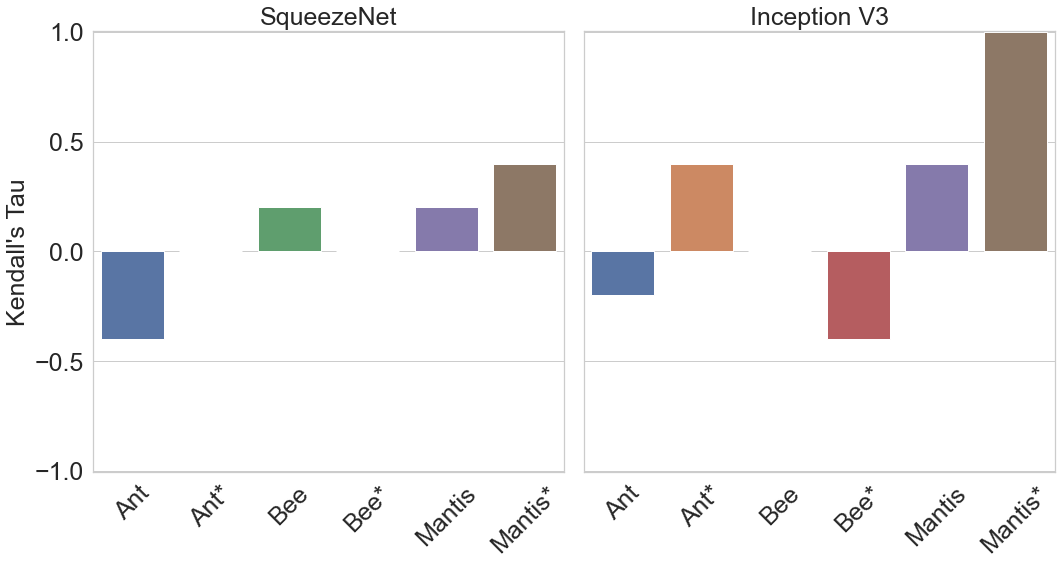

In [23]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,8))

axes[0].set_title("SqueezeNet", fontsize=25)
axes[1].set_title("Inception V3", fontsize=25)

sns.set_theme(style="whitegrid")
sns.barplot(ax=axes[0], x=keys_sq, y=values_sq)
sns.barplot(ax=axes[1], x=keys_inc, y=values_inc)

axes[0].set(ylim=[-1.005, 1.005])
axes[0].set_ylabel('Kendall\'s Tau', fontsize = 25)

for ax in axes:
    ax.tick_params(labelsize=25)
    for item in ax.get_xticklabels():
        item.set_rotation(45)


fig.subplots_adjust(wspace=0.25)
plt.tight_layout()
plt.savefig('kt_imagenet.pdf')